# Linear Regression

# Prediction Engines: Regression Approach

Regression is a basic and commonly used type of predictive analysis.  
The overall idea of regression is to assess: 

- does a set of predictor/explainatory variables (features) do a good job in predicting an outcome (dependent/response) variable?  
- Which explainatory variables (features) in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  
- What is the estimated(predicted) value of the response under various excitation (explainatory) variable values?
- What is the uncertainty involved in the prediction?

These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.  

The simplest form is a linear regression equation with one dependent(response) and one independent(explainatory) variable is defined by the formula 

$y_i = \beta_0 + \beta_1*x_i$, where $y_i$ = estimated dependent(response) variable value, $\beta_0$ = constant(intercept), $\beta_1$ = regression coefficient (slope), and $x_i$ = independent(predictor) variable value

## Fundamental Questions

- What is regression used for?
- Why is it useful?

Three major uses for regression analysis are (1) determining the strength of predictors, (2) forecasting an effect, and (3) trend forecasting.

> First, the regression might be used to identify the strength of the effect that the independent variable(s) have on a dependent variable.  Typical questions are what is the strength of relationship between dose and effect, sales and marketing spending, or age and income.
<br><br>Second, it can be used to forecast effects or impact of changes.  That is, the regression analysis helps us to understand how much the dependent variable changes with a change in one or more independent variables.  A typical question is, "how much additional sales income do I get for each additional \$1000 spent on marketing?"
<br><br>Third, regression analysis predicts trends and future values.  The regression analysis can be used to get point estimates.  A typical question is, “what will the price of gold be in 6 months?”


Consider the image below from a Texas Instruments Calculator user manual

![](ti-manual.png)

In the context of our class, the straight solid line is the `Data Model` whose equation structure is
$Y = \beta_0 + \beta_1*X$.
The ordered pairs $(x_i,y_i)$ in the scatterplot are the observation (or training set).
As depicted here $Y$ is the response to different values of the  feature (explainitory variable) $X$. The typical convention is response on the up-down axis, but not always.

The model parameters are $\beta_0$ and $\beta_1$ ; once known can estimate (predict) response to (as yet) unobserved values of $x$

Classically, the normal equations are evaluated to find the model parameters:

$\beta_1 = \frac{\sum x\sum y~-~N\sum xy}{(\sum x)^2~-~N\sum x^2}$ and $\beta_0 = \bar y - \beta_1 \bar x$

> Recall from our earlier discussions, we can dispense with the normal equations and if we have a way to update guesses of $\beta_0$ and $\beta_1$ we can simple yell at the machine **Learn dammit** and choose the best values of $\beta_0$ and $\beta_1$ that minimize our metric function value.  Use of calculus in this instance greatly speeds up this process.  

### Classical Regression by Normal Equations

We will illustrate the classical approach to finding the slope and intercept using the normal equations first a plotting function, then we will use the values from the Texas Instruments TI-55 user manual.

In [97]:
### Lets Make a Plotting Package

def makeAbear(xvalues,yvalues,xleft,yleft,xright,yright,xlab,ylab,title):
# plotting function dependent on matplotlib installed above 
# xvalues, yvalues == data pairs to scatterplot; FLOAT
# xleft,yleft == left endpoint line to draw; FLOAT
# xright,yright == right endpoint line to draw; FLOAT
# xlab,ylab == axis labels, STRINGS!!
# title == Plot title, STRING
    import matplotlib.pyplot 
    matplotlib.pyplot.scatter(xvalues,yvalues)
    matplotlib.pyplot.plot([xleft, xright], [yleft, yright], 'k--', lw=2, color="red")
    matplotlib.pyplot.xlabel(xlab)
    matplotlib.pyplot.ylabel(ylab)
    matplotlib.pyplot.title(title)
    matplotlib.pyplot.show()
    return

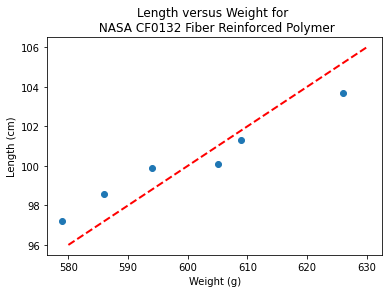

In [98]:
# Make two lists
sample_length = [101.3,103.7,98.6,99.9,97.2,100.1]
sample_weight = [609,626,586,594,579,605]
# We will assume weight is the explainatory variable, and it is to be used to predict length.
makeAbear(sample_weight, sample_length,580,96,630,106,'Weight (g)','Length (cm)','Length versus Weight for \n NASA CF0132 Fiber Reinforced Polymer')

Notice the dashed line, we supplied only two (x,y) pairs to plot the line, so lets get a colonoscope and find where it came from.

In [99]:
def myline(slope,intercept,value1,value2):
    '''Returns a tuple ([x1,x2],[y1,y2]) from y=slope*value+intercept'''
    listy = [] 
    listx = []
    listx.append(value1)
    listx.append(value2)
    listy.append(slope*listx[0]+intercept)
    listy.append(slope*listx[1]+intercept)
    return(listx,listy)

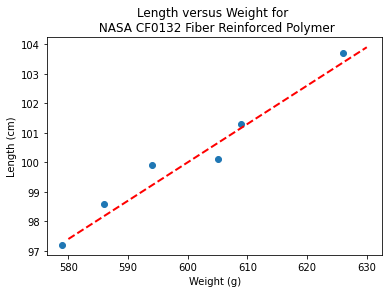

In [100]:
slope = 0.13  #0.13
intercept = 22 # 23
xlow = 580
xhigh = 630
object = myline(slope,intercept,xlow,xhigh)
xone = object[0][0]; xtwo = object[0][1]; yone = object[1][0]; ytwo = object[1][1]
makeAbear(sample_weight, sample_length,xone,yone,xtwo,ytwo,'Weight (g)','Length (cm)','Length versus Weight for \n NASA CF0132 Fiber Reinforced Polymer')

In [101]:
print(xone,yone)
print(xtwo,ytwo)

580 97.4
630 103.9


In [102]:
# Evaluate the normal equations
sumx = 0.0
sumy = 0.0
sumxy = 0.0
sumx2 = 0.0
sumy2 = 0.0
for i in range(len(sample_weight)):
    sumx = sumx + sample_weight[i]
    sumx2 = sumx2 + sample_weight[i]**2
    sumy = sumy + sample_length[i]
    sumy2 = sumy2 + sample_length[i]**2
    sumxy = sumxy + sample_weight[i]*sample_length[i]
b1 = (sumx*sumy - len(sample_weight)*sumxy)/(sumx**2-len(sample_weight)*sumx2)
b0 = sumy/len(sample_length) - b1* (sumx/len(sample_weight))
lineout = ("Linear Model is y=%.3f" % b1) + ("x + %.3f" % b0)
print("Linear Model is y=%.3f" % b1 ,"x + %.3f" % b0)

Linear Model is y=0.129 x + 22.813


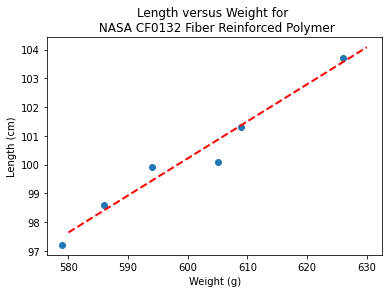

In [103]:
slope = 0.129  #0.129
intercept = 22.813  # 22.813
xlow = 580
xhigh = 630
object = myline(slope,intercept,xlow,xhigh)
xone = object[0][0]; xtwo = object[0][1]; yone = object[1][0]; ytwo = object[1][1]
makeAbear(sample_weight, sample_length,xone,yone,xtwo,ytwo,'Weight (g)','Length (cm)','Length versus Weight for \n NASA CF0132 Fiber Reinforced Polymer')

### Where do these normal equations come from?
Consider our linear model $y = \beta_0 + \beta_1 \cdot x + \epsilon$. Where $\epsilon$ is the error in the estimate. If we square each error and add them up (for our training set) we will have $\sum \epsilon^2 = \sum (y_i - \beta_0 - \beta_1 \cdot x_i)^2 $.  Our goal is to minimize this error by our choice of $\beta_0 $ and $ \beta_1 $

The necessary and sufficient conditions for a minimum is that the first partial derivatives of the `error` as a function must vanish (be equal to zero).  We can leverage that requirement as

$\frac{\partial(\sum \epsilon^2)}{\partial \beta_0} = \frac{\partial{\sum (y_i - \beta_0 - \beta_1 \cdot x_i)^2}}{\partial \beta_0} = - \sum 2[y_i - \beta_0 + \beta_1 \cdot x_i] = -2(\sum_{i=1}^n y_i - n \beta_0 - \beta_1 \sum_{i=1}^n x_i) = 0 $

and

$\frac{\partial(\sum \epsilon^2)}{\partial \beta_1} = \frac{\partial{\sum (y_i - \beta_0 - \beta_1 \cdot x_i)^2}}{\partial \beta_1} = - \sum 2[y_i - \beta_0 + \beta_1 \cdot x_i]x_i = -2(\sum_{i=1}^n x_i y_i - n \beta_0 \sum_{i=1}^n x_i - \beta_1 \sum_{i=1}^n x_i^2) = 0 $

Solving the two equations for $\beta_0$ and $\beta_1$ produces the normal equations (for linear least squares), which leads to

$\beta_1 = \frac{\sum x\sum y~-~n\sum xy}{(\sum x)^2~-~n\sum x^2}$
$\beta_0 = \bar y - \beta_1 \bar x$



> Now lets convince ourselves that our **Learn dammit** approach will work about the same.  Below we will just grid search, but a better way would involve some way to update the parameters based on the current quality function.  Also we have leveraged our apriori knowledge of the range of values to search.

In [104]:
# identify, collect, load data

# sample_weight == predictor
# sample_length == response
input1 = sample_weight
output = sample_length
# a prediction engine structure (notice some logic to handle zeros)
def response(beta1,beta2,predictor1):
    response = beta1+beta2*predictor1
    return(response)
# a measure of model quality
def quality(observed_list,model_list): 
    if len(observed_list) != len(model_list):
        raise Exception("List lengths incompatable")
    sse = 0.0
    howmany=len(observed_list)
    for i in range(howmany):
        sse=sse + (observed_list[i]-model_list[i])**2
    return(sse)
# define search region 
index_list1 = [i for i in range(1900,2400,1)] # index list1 is 19 - 24 in steps of 0.01
index_list2 = [i for i in range(0,2000,1)] # index list2 is 0 - 2 in steps of 0.001
howmany = 0 # keep count of how many combinations
error   = 1e99          # a big value, we are trying to drive this to zero
xbest   = [-1,-1] # variables to store our best solution parameters
modeloutput = [0 for i in range(len(output))] # space to store model responses


# perform a search - here we use nested repetition
for i1 in index_list1:
    for i2 in index_list2:
        howmany=howmany+1 # keep count of how many times we learn
        beta1 = i1/100
        beta2 = i2/1000
        for irow in range(len(output)): 
            modeloutput[irow]=response(beta1,beta2,input1[irow])
        guess = quality(output,modeloutput) # current model quality
 #               print(guess)
        if guess <= error:
            error = guess
            xbest[0]= beta1
            xbest[1]= beta2

print("Search Complete - Error Value ",round(error,8))
print("Combinations Examined : ",howmany)
print("Beta 1 ",xbest[0])
print("Beta 2 ",xbest[1])

Search Complete - Error Value  0.919755
Combinations Examined :  1000000
Beta 1  22.75
Beta 2  0.129


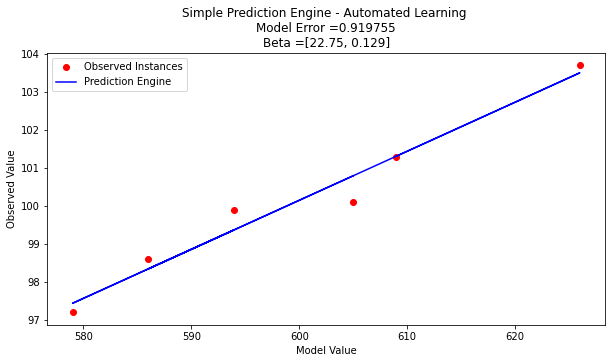

In [105]:
for irow in range(len(output)): 
    modeloutput[irow]=response(xbest[0],xbest[1],input1[irow])

# now the plot
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Simple Prediction Engine - Automated Learning \n'
plottitle = plottitle + 'Model Error =' + repr(round(error,8)) + '\n'
plottitle = plottitle + 'Beta =' + repr(xbest)
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(input1, output, c='red',linewidth=0,marker='o') 
plt.plot(input1, modeloutput, c='blue')
plt.xlabel('Model Value')
plt.ylabel('Observed Value')
plt.legend(['Observed Instances','Prediction Engine'])
plt.title(plottitle)
plt.show()

Lets consider a more flexible way by fitting the data model using linear algebra instead of the summation notation.

### Computational Linear Algebra 
We will start again with our linear data model

$y_i = \beta_0 + \beta_1 \cdot x_i + \epsilon_i$  then replace with vectors as

$$
\begin{gather}
\mathbf{Y}=
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n \\
\end{pmatrix}
\end{gather}
$$

$$
\begin{gather}
\mathbf{\beta}=
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\end{pmatrix}
\end{gather}
$$

$$
\begin{gather}
\mathbf{X}=
\begin{pmatrix}
1 & x_1 & x_1^2\\
1 & x_2 & x_2^2\\
\vdots \\
1 & x_n & x_n^2\\
\end{pmatrix}
\end{gather}
$$

$$
\begin{gather}
\mathbf{\epsilon}=
\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n \\
\end{pmatrix}
\end{gather}
$$

So our system can now be expressed in matrix-vector form as

$\mathbf{Y}=\mathbf{X}\mathbf{\beta}+\mathbf{\epsilon}$ if we perfrom the same vector calculus as before we will end up with a result where pre-multiply by the transpose of $\mathbf{X}$ we will have a linear system in $\mathbf{\beta}$ which we can solve using Gaussian reduction, or LU decomposition or some other similar method.

The resulting system (that minimizes $\mathbf{\epsilon^T}\mathbf{\epsilon}$) is

$\mathbf{X^T}\mathbf{Y}=\mathbf{X^T}\mathbf{X}\mathbf{\beta}$ and solving for the parameters gives
$\mathbf{\beta}=(\mathbf{X^T}\mathbf{X})^{-1}\mathbf{X^T}\mathbf{Y}$

So lets apply it to our example - what follows is mostly in python primative

In [106]:
# linearsolver with pivoting adapted from 
# https://stackoverflow.com/questions/31957096/gaussian-elimination-with-pivoting-in-python/31959226
def linearsolver(A,b):
    n = len(A)
    M = A

    i = 0
    for x in M:
     x.append(b[i])
     i += 1
# row reduction with pivots
    for k in range(n):
     for i in range(k,n):
       if abs(M[i][k]) > abs(M[k][k]):
          M[k], M[i] = M[i],M[k]
       else:
          pass

     for j in range(k+1,n):
         q = float(M[j][k]) / M[k][k]
         for m in range(k, n+1):
            M[j][m] -=  q * M[k][m]
# allocate space for result
    x = [0 for i in range(n)]
# back-substitution
    x[n-1] =float(M[n-1][n])/M[n-1][n-1]
    for i in range (n-1,-1,-1):
      z = 0
      for j in range(i+1,n):
          z = z  + float(M[i][j])*x[j]
      x[i] = float(M[i][n] - z)/M[i][i]
# return result
    return(x)
#######

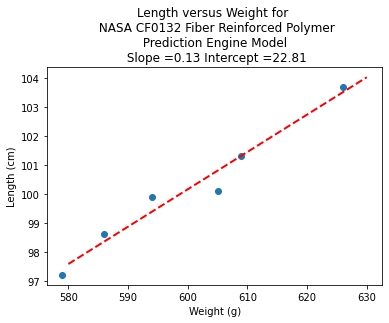

In [107]:
# matrix multiply script
def mmult(amatrix,bmatrix,rowNumA,colNumA,rowNumB,colNumB):
    result_matrix = [[0 for j in range(colNumB)] for i in range(rowNumA)]
    for i in range(0,rowNumA):
        for j in range(0,colNumB):
            for k in range(0,colNumA):
                result_matrix[i][j]=result_matrix[i][j]+amatrix[i][k]*bmatrix[k][j]
    return(result_matrix)
# matrix vector multiply script
def mvmult(amatrix,bvector,rowNumA,colNumA):
    result_v = [0 for i in range(rowNumA)]
    for i in range(0,rowNumA):
        for j in range(0,colNumA):
                result_v[i]=result_v[i]+amatrix[i][j]*bvector[j]
    return(result_v)

colNumX=2 #
rowNumX=len(sample_weight)
xmatrix = [[1 for j in range(colNumX)]for i in range(rowNumX)]
xtransp = [[1 for j in range(rowNumX)]for i in range(colNumX)]
yvector = [0 for i in range(rowNumX)]
for irow in range(rowNumX):
    xmatrix[irow][1]=sample_weight[irow]
    xtransp[1][irow]=sample_weight[irow]
    yvector[irow]   =sample_length[irow]
xtx = [[0 for j in range(colNumX)]for i in range(colNumX)]
xty = []

xtx = mmult(xtransp,xmatrix,colNumX,rowNumX,rowNumX,colNumX)
xty = mvmult(xtransp,yvector,colNumX,rowNumX)

beta = []
#solve XtXB = XtY for B
beta = linearsolver(xtx,xty) #Solve the linear system

slope = beta[1] #0.129
intercept = beta[0]  # 22.813
xlow = 580
xhigh = 630
object = myline(slope,intercept,xlow,xhigh)
xone = object[0][0]; xtwo = object[0][1]; yone = object[1][0]; ytwo = object[1][1]
charttitle ='Length versus Weight for \n NASA CF0132 Fiber Reinforced Polymer'+'\n Prediction Engine Model \n Slope ='+str(round(slope,2))+' Intercept ='+str(round(intercept,2))
makeAbear(sample_weight, sample_length,xone,yone,xtwo,ytwo,'Weight (g)','Length (cm)',charttitle)

#### What's the Value of the Computational Linear Algebra ?

The value comes when we have more explainatory variables, and we may want to deal with curvature.

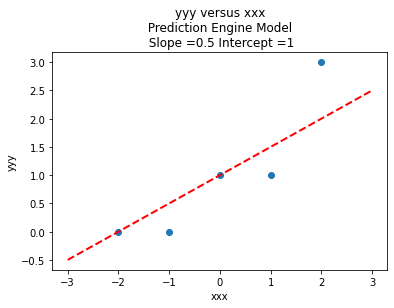

In [108]:
# Make two lists
yyy = [0,0,1,1,3]
xxx = [-2,-1,0,1,2]
slope = 0.5  #0.129
intercept = 1  # 22.813
xlow = -3
xhigh = 3
object = myline(slope,intercept,xlow,xhigh)
xone = object[0][0]; xtwo = object[0][1]; yone = object[1][0]; ytwo = object[1][1]
charttitle ='yyy versus xxx'+'\n Prediction Engine Model \n Slope ='+str(round(slope,2))+' Intercept ='+str(round(intercept,2))
makeAbear(xxx, yyy,xone,yone,xtwo,ytwo,'xxx','yyy',charttitle)

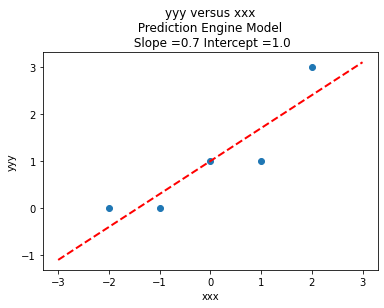

In [109]:
colNumX=2 #
rowNumX=len(xxx)
xmatrix = [[1 for j in range(colNumX)]for i in range(rowNumX)]
xtransp = [[1 for j in range(rowNumX)]for i in range(colNumX)]
yvector = [0 for i in range(rowNumX)]
for irow in range(rowNumX):
    xmatrix[irow][1]=xxx[irow]
    xtransp[1][irow]=xxx[irow]
    yvector[irow]   =yyy[irow]
xtx = [[0 for j in range(colNumX)]for i in range(colNumX)]
xty = []

xtx = mmult(xtransp,xmatrix,colNumX,rowNumX,rowNumX,colNumX)
xty = mvmult(xtransp,yvector,colNumX,rowNumX)

beta = []
#solve XtXB = XtY for B
beta = linearsolver(xtx,xty) #Solve the linear system

slope = beta[1] #0.129
intercept = beta[0]  # 22.813
xlow = -3
xhigh = 3
object = myline(slope,intercept,xlow,xhigh)
xone = object[0][0]; xtwo = object[0][1]; yone = object[1][0]; ytwo = object[1][1]
charttitle ='yyy versus xxx'+'\n Prediction Engine Model \n Slope ='+str(round(slope,2))+' Intercept ='+str(round(intercept,2))
makeAbear(xxx, yyy,xone,yone,xtwo,ytwo,'xxx','yyy',charttitle)

In [110]:
colNumX=4 #
rowNumX=len(xxx)
xmatrix = [[1 for j in range(colNumX)]for i in range(rowNumX)]
xtransp = [[1 for j in range(rowNumX)]for i in range(colNumX)]
yvector = [0 for i in range(rowNumX)]
for irow in range(rowNumX):
    xmatrix[irow][1]=xxx[irow]
    xmatrix[irow][2]=xxx[irow]**2
    xmatrix[irow][3]=xxx[irow]**3
    xtransp[1][irow]=xxx[irow]
    xtransp[2][irow]=xxx[irow]**2
    xtransp[3][irow]=xxx[irow]**3
    yvector[irow]   =yyy[irow]
xtx = [[0 for j in range(colNumX)]for i in range(colNumX)]
xty = []

xtx = mmult(xtransp,xmatrix,colNumX,rowNumX,rowNumX,colNumX)
xty = mvmult(xtransp,yvector,colNumX,rowNumX)

beta = []
#solve XtXB = XtY for B
beta = linearsolver(xtx,xty) #Solve the linear system



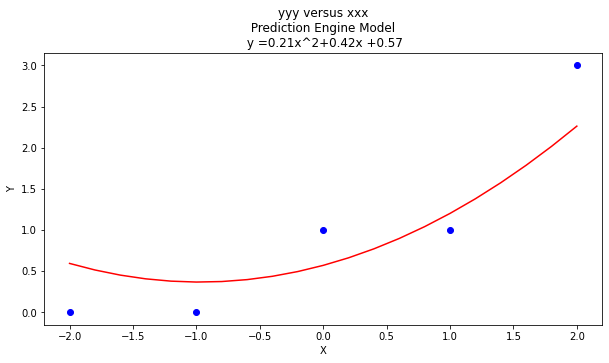

In [111]:
howMany = 20
xlow = -2
xhigh = 2
deltax = (xhigh - xlow)/howMany
xmodel = []
ymodel = []
for i in range(howMany+1):
    xnow = xlow + deltax*float(i)
    xmodel.append(xnow)
    ymodel.append(beta[0]+beta[1]*xnow+beta[2]*xnow**2)

# Now plot the sample values and plotting position
import matplotlib.pyplot 
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.scatter(xxx, yyy,  color ='blue') 
matplotlib.pyplot.plot(xmodel, ymodel,  color ='red') 
matplotlib.pyplot.ylabel("Y") 
matplotlib.pyplot.xlabel("X") 
charttitle ='yyy versus xxx'+'\n Prediction Engine Model \n y ='+str(round(beta[2],2))+'x^2+'+str(round(beta[1],2))+'x +'+str(round(beta[0],2))
matplotlib.pyplot.title(charttitle) 
matplotlib.pyplot.show()

### Now using numpy 

Here we will repeat using numpy for the solver code should get identical results, lets get an example from the mighty internet and beat it into our original example above. 

Taking the example from [Here](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)

Removing the narrative we have:


[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
0.9999999999999999 -0.9499999999999994


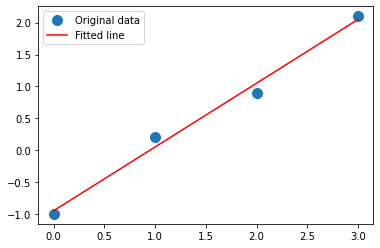

In [112]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T
print(A)
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)
import matplotlib.pyplot as plt
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()

plt.show()

0.12890365448504984 22.812624584717575


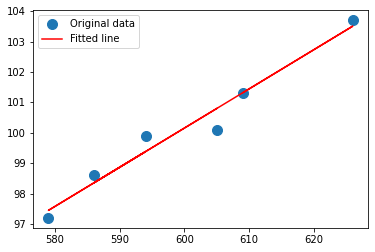

In [113]:
# Copy above, change x and y to our variables/design matrix
x = np.array(sample_weight)
y = np.array(sample_length)
A = np.vstack([x, np.ones(len(x))]).T
#print(A)
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)
import matplotlib.pyplot as plt
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()

plt.show()

## Exercises (In-Class)

### Background
Most drugs have therapeutic benefits when the drug is above a “therapeutic threshold” but toxic side effects above a “toxic threshold”. Dosing protocols are intended to maintain the level of the drug in the patient’s blood within a “therapeutic window” that between these two thresholds. Using mathematical models helps an engineer optimize the drug design so the entire delivery process is as efficient as possible and localized drug concentrations are kept within a therapeutic window.  Here you will test some mathematical models for just one part of this process - an in vitro experiment of drug release from a nanoparticle. (“Nanosystems for Simultaneous Imaging and Drug Delivery to T Cells”, by Fahmy et al, AAPS Journal, 2007 vol 9.). The experimental results are listed below


|Time(Days) | $\mu$-grams released|
|---|---|
|0 |2.5|
|0.25|3.6|
|0.5|5.3|
|1|9.5|
|2|14.0|
|3|16.5|
|4|18.8|
|5|21.5|
|6|23.2|
|8|26.8|
|10|28.4|


### Exercise 1
1. Plot the drug release data with time on the horizontal axis, and mass released on the vertical axis. Use red circles as the marker.  

2. Create and plot a linear data model using a blue curve for the model. $\mu g_{release} = \beta_0 + \beta_1 \cdot t_{days}$ 

3. Create a list of prediction error; produce a histogram of these errors (called residuals).

4. Compute the sum of the squares of all of the residuals. 

2.6521827617787723 5.879612292663069


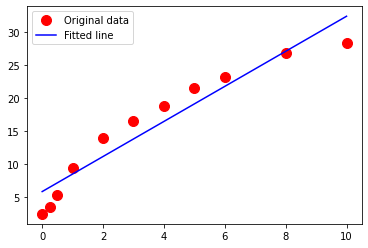

In [131]:
# code here
# plotting function

# linear model function

def funny(a,b,tttt2):
    funny=a+b*tttt2
    return(funny)

bac = [2.5,
3.6,
5.3,
9.5,
14,
16.5,
18.8,
21.5,
23.2,
26.8,
28.4]
time = [0,
0.25,
0.5,
1,
2,
3,
4,
5,
6,
8,
10]
# supply data
# build lists of observation
# build lists of model
a = 1
b = 2.5
# Copy above, change x and y to our variables/design matrix
x = np.array(time)
y = np.array(bac)
A = np.vstack([x, np.ones(len(x))]).T
#print(A)
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)
a = c
b = m
bacmodel = [0. for i in range(len(bac))]
for irow in range(len(time)):
    bacmodel[irow] = funny(a,b,time[irow])

    
import matplotlib.pyplot as plt
_ = plt.plot(time, bac, 'o', label='Original data', markersize=10, color ='red')
_ = plt.plot(time,bacmodel, 'r', label='Fitted line', color= 'blue')
_ = plt.legend()

plt.show()
# build lists of observation
# build lists of model
# plot
# prediction residuals
# sum_of_squares


### Exercise-2

Using the drug release data, repeat your analysis using a 2-nd order polynomial data model 

$\mu g_{release} = \beta_0 + \beta_1 \cdot t_{days} + \beta_2 \cdot t_{days}^2 $ 

1. Perform your trial-and-error fit for this model. Report the sum of square of residuals of your fitted data model.


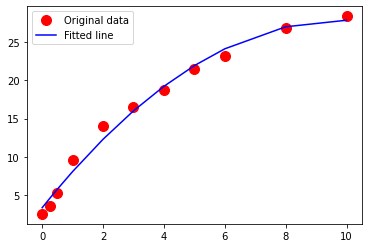

In [137]:
# code here
# quadratic model function
def funnyhaha(a,b,cc,tttt2):
    funnyhaha=a+b*tttt2+cc*(tttt2**2)
    return(funnyhaha)
# build lists of model
# plot
# prediction residuals
# Copy above, change x and y to our variables/design matrix
x = np.array(time)
xx = x*x
# print(xx)
y = np.array(bac)
A = np.vstack([xx, x, np.ones(len(x))]).T
#print(A)
cc, b, a = np.linalg.lstsq(A, y, rcond=None)[0]
# sum_of_squares
bacmodel = [0. for i in range(len(bac))]
for irow in range(len(time)):
    bacmodel[irow] = funnyhaha(a,b,cc,time[irow])

    
import matplotlib.pyplot as plt
_ = plt.plot(time, bac, 'o', label='Original data', markersize=10, color ='red')
_ = plt.plot(time,bacmodel, 'r', label='Fitted line', color= 'blue')
_ = plt.legend()

plt.show()
# build lists of observation
# build lists of model
# plot
# prediction residuals
# sum_of_squares

## Exercise-3

Using the drug release data, repeat your analysis using a 3-rd order polynomial data model 

$\mu g_{release} = \beta_0 + \beta_1 \cdot t_{days} + \beta_2 \cdot t_{days}^2 + \beta_3 \cdot t_{days}^3$ 

1. Perform your trial-and-error fit. Report the sum of square of residuals of your fitted data model.

2. What is the order of the polynomial that gives the best fit in terms of the lowest sum of square of residuals? 

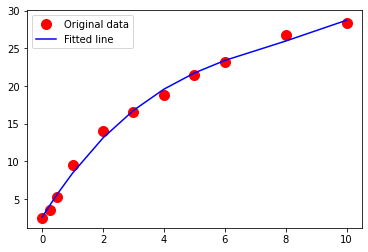

In [138]:
# code here
# cubic model function
# code here
# quadratic model function
def funnylol(a,b,cc,ccc,tttt2):
    funnylol=a+b*tttt2+cc*(tttt2**2)+ccc*(tttt2**3)
    return(funnylol)
# build lists of model
# plot
# prediction residuals
# Copy above, change x and y to our variables/design matrix
x = np.array(time)
xx = x*x
xxx =xx*x
# print(xx)
y = np.array(bac)
A = np.vstack([xxx, xx, x, np.ones(len(x))]).T
#print(A)
ccc, cc, b, a = np.linalg.lstsq(A, y, rcond=None)[0]
# sum_of_squares
bacmodel = [0. for i in range(len(bac))]
for irow in range(len(time)):
    bacmodel[irow] = funnylol(a,b,cc,ccc,time[irow])

    
import matplotlib.pyplot as plt
_ = plt.plot(time, bac, 'o', label='Original data', markersize=10, color ='red')
_ = plt.plot(time,bacmodel, 'r', label='Fitted line', color= 'blue')
_ = plt.legend()

plt.show()
# build lists of observation
# build lists of model
# plot
# prediction residuals
# sum_of_squares
# build lists of model
# plot
# prediction residuals
# sum_of_squares

## Exercise-4

Using the drug release data, repeat your analysis using an exponential-decay type model 

$\mu g_{release} = \beta_0 (1- e^{-\beta_1 \cdot t_{days}}) $ 

1. Perform your trial-and-error fit for this model. Report the sum of square of residuals of your fitted data model.

In [117]:
# code here
# exponential decay model function
# build lists of model
# plot
# prediction residuals
# sum_of_squares

## Exercise-5

Which of the drug-release models do you like best?  Why?  The parameters in the exponential-decay model have bio-chemical conceptual meaning.  What is the significance of $\beta_0$ in this model? (Consider what happens as time gets large)

In [118]:
# change to markdown and write your answer

## Exercise-5 (continued)

Using your favorite data model predict the drug release for days 11-21 inclusive.  Compare your predictions to observations reported from the drug trials below:

|Time(Days) | $\mu$-grams released|
|---|---|
|12 |28.4|
|16 |28.5|
|21 |29.5|


In [119]:
# code here
# add new data to observations
# use favorite model function with already determined parameters
# build lists of model
# plot
# compute prediction error 
# report error for 12,16,21 days values

## Concrete Strength Database

Now lets examine the concrete database again and see what kind of prediction engine we can come up with.

In [120]:
#Get database -- use the Get Data From URL Script
#Step 1: import needed modules to interact with the internet
import requests
#Step 2: make the connection to the remote file (actually its implementing "bash curl -O http://fqdn/path ...")
remote_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls' # an Excel file
response = requests.get(remote_url) # Gets the file contents puts into an object
output = open('concreteData.xls', 'wb') # Prepare a destination, local
output.write(response.content) # write contents of object to named local file
output.close() # close the connection

Import/install support packages (if install required, either on your machine, or contact network admin to do a root install)

In [121]:
# The usual suspects plus some newish ones!
### Import/install support packages
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn 
#%matplotlib inline

Now try to read the file, use pandas methods

In [122]:
data = pandas.read_excel("concreteData.xls")

lorem ipsum


lorem ipsum

## topic

### Subtopic
lorem ipsum



## References
1. Chan, Jamie. Machine Learning With Python For Beginners: A Step-By-Step Guide with Hands-On Projects (Learn Coding Fast with Hands-On Project Book 7) (p. 2). Kindle Edition. 